# DSCI 592 Capstone II: Group Project
## Team: Safe CIty
## NY-Bronx (Regression)

In [2]:
# Common imports
import numpy as np
import pandas as pd
import seaborn as sns

# To plot pretty figures
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.cluster import KMeans
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import scale, StandardScaler
from sklearn.decomposition import PCA

# to make this notebook's output identical at every run
np.random.seed(42)

# Ignore useless warnings
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

## 1. Preparing data

In [3]:
# Import the data as Pandas DataFrame as follows
df = pd.read_csv("df_bronx_k4.csv")

In [4]:
df.head()

,FELONY,MISDEMEANOR,VIOLATION,Crime,zip,latitude,longitude,K_mean
0,7348,15042,4106,26496,10451,40.821109,-73.920985,1
1,7991,17451,4419,29861,10452,40.837664,-73.921406,1
2,7494,13431,4918,25843,10453,40.852023,-73.911923,1
3,6045,11657,3179,20881,10454,40.808346,-73.919634,1
4,7670,14203,3860,25733,10455,40.815511,-73.911388,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   FELONY       25 non-null     int64  
 1   MISDEMEANOR  25 non-null     int64  
 2   VIOLATION    25 non-null     int64  
 3   Crime        25 non-null     int64  
 4   zip          25 non-null     int64  
 5   latitude     25 non-null     float64
 6   longitude    25 non-null     float64
 7   K_mean       25 non-null     int64  
dtypes: float64(2), int64(6)
memory usage: 1.7 KB


## 2. Split train-target data

In [6]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(df, test_size=0.3, random_state=40)
#train_set, test_set = train_test_split(df, test_size=0.2, random_state=42)

In [7]:
train_set.head()

,FELONY,MISDEMEANOR,VIOLATION,Crime,zip,latitude,longitude,K_mean
11,4597,9519,2590,16706,10462,40.842953,-73.860106,2
17,7811,13871,3237,24919,10468,40.865360,-73.899697,1
4,7670,14203,3860,25733,10455,40.815511,-73.911388,1
8,6285,12592,3669,22546,10459,40.824217,-73.894382,1
16,9592,18572,4950,33114,10467,40.874131,-73.871121,1


In [8]:
test_set.head()

,FELONY,MISDEMEANOR,VIOLATION,Crime,zip,latitude,longitude,K_mean
15,6379,11902,3886,22167,10466,40.889927,-73.850596,2
24,2182,4990,1522,8694,10475,40.873872,-73.827093,0
14,2722,6528,2223,11473,10465,40.826523,-73.824668,0
19,1290,2423,667,4380,10470,40.901512,-73.856846,3
13,213,486,230,929,10464,40.849311,-73.788727,0


### Numerical variables
- latitude
- longitude

### Categorical variables
- K-mean (Cluster using K-mean)

### Target
- Target variables: number of crimes

In [9]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

numeric_features = ["latitude", "longitude"]

numeric_transformer = Pipeline(steps=[('scaler', StandardScaler())])

categorical_features = ["K_mean"]
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

full_pipeline = ColumnTransformer([
    ("num", numeric_transformer, numeric_features),
    ("cat", categorical_transformer, categorical_features)
])

train_prepared = full_pipeline.fit_transform(train_set)
test_prepared = full_pipeline.fit_transform(test_set)

In [10]:
# Need to check the shape of train and test data, since C3 has only  2 points.
train_prepared.shape

(17, 6)

In [11]:
test_prepared.shape

(8, 6)

In [12]:
# Save labels (target)
train_labels = train_set["Crime"].copy()
test_labels = test_set["Crime"].copy() 

## 3. Linear Regression

In [13]:
from sklearn.linear_model import LinearRegression
# Train LinearRegressor
lin_reg = LinearRegression()
lin_reg.fit(train_prepared, train_labels)

LinearRegression()

In [14]:
from sklearn.metrics import mean_squared_error
lin_train_pred = lin_reg.predict(train_prepared)
lin_mse_train = mean_squared_error(train_labels, lin_train_pred)
lin_rmse_train = np.sqrt(lin_mse_train)
lin_rmse_train

3134.088618545642

In [15]:
train_predictions = lin_reg.predict(train_prepared)

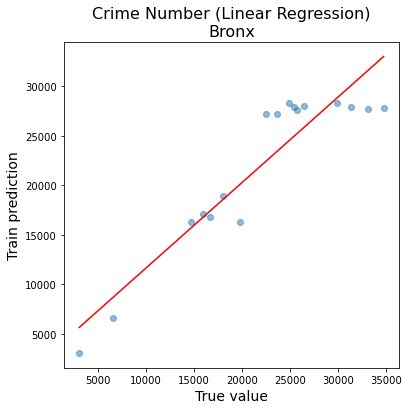

In [16]:
fig = plt.figure(figsize=(6, 6))
_ = plt.scatter(train_labels, lin_train_pred, alpha=0.5)
_ = plt.xlabel("True value", fontsize=14)
_ = plt.ylabel("Train prediction", fontsize=14)
_ = plt.title("Crime Number (Linear Regression)\nBronx",fontsize=16)

#Fitted line
line = LinearRegression()
line.fit(np.array(train_labels).reshape(-1,1), train_predictions)
b = line.intercept_
a = line.coef_[0]
x = np.linspace(min(train_labels),max(train_labels),100)
y = a*x+b
_ = plt.plot(x,y,'-r')

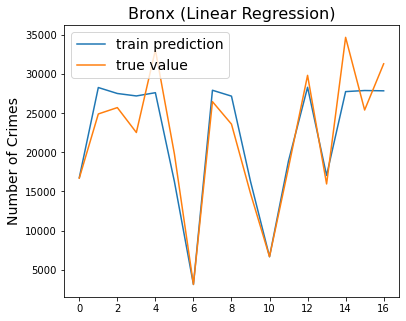

In [31]:
fig = plt.figure(figsize=(6, 5))
_ = plt.plot(range(len(train_prepared)), train_predictions, label="train prediction")
_ = plt.plot(range(len(train_prepared)), train_labels, label="true value")
_ = plt.legend(fontsize=14)
_ = plt.ylabel("Number of Crimes",fontsize=14)
_ = plt.title("Bronx (Linear Regression)",fontsize=16)

In [32]:
test_predictions = lin_reg.predict(test_prepared)

In [33]:
lin_mse_test = mean_squared_error(test_labels, test_predictions)
lin_rmse_test = np.sqrt(lin_mse_test)
lin_rmse_test

4188.655055508342

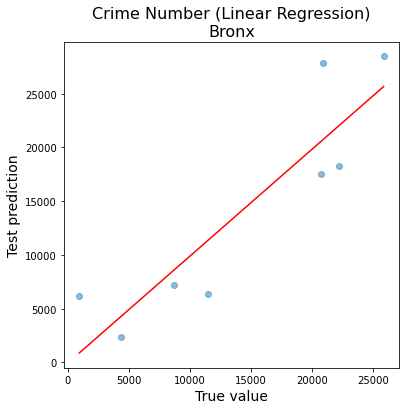

In [34]:
fig = plt.figure(figsize=(6, 6))
_ = plt.scatter(test_labels,test_predictions, alpha=0.5)
#plt.xlim([0,800])
#plt.ylim([0,800])
plt.xlabel("True value", fontsize=14)
_ = plt.ylabel("Test prediction", fontsize=14)
_ = plt.title("Crime Number (Linear Regression)\nBronx",fontsize=16)

#Fitted line
line = LinearRegression()
line.fit(np.array(test_labels).reshape(-1,1), test_predictions)
b = line.intercept_
a = line.coef_[0]
x = np.linspace(min(test_labels),max(test_labels),100)
y = a*x+b
_ = plt.plot(x,y,'-r')

In [35]:
from scipy.stats import pearsonr
corr, _ = pearsonr(test_predictions, test_labels)
r2 = corr**2
r2

0.8082269306515568

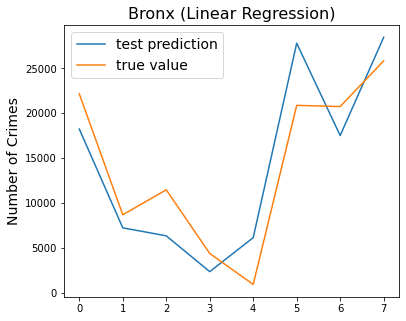

In [36]:
fig = plt.figure(figsize=(6, 5))
_ = plt.plot(range(len(test_prepared)), test_predictions, label="test prediction")
_ = plt.plot(range(len(test_prepared)), test_labels, label="true value")
_ = plt.legend(fontsize=14)
_ = plt.ylabel("Number of Crimes",fontsize=14)
_ = plt.title("Bronx (Linear Regression)",fontsize=16)

## 4. Random Forest Model

In [37]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(random_state=42)
forest_reg.fit(train_prepared, train_labels)

RandomForestRegressor(random_state=42)

In [38]:
from sklearn.metrics import mean_squared_error
rf_train_pred = forest_reg.predict(train_prepared)
rf_mse_train = mean_squared_error(train_labels, rf_train_pred)
rf_rmse_train = np.sqrt(lin_mse_train)
rf_rmse_train

3134.088618545642

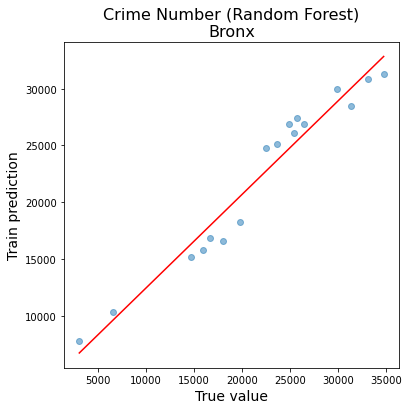

In [39]:
fig = plt.figure(figsize=(6, 6))
_ = plt.scatter(train_labels, rf_train_pred, alpha=0.5)
_ = plt.xlabel("True value", fontsize=14)
_ = plt.ylabel("Train prediction", fontsize=14)
_ = plt.title("Crime Number (Random Forest)\nBronx", fontsize = 16)

#Fitted line
line = LinearRegression()
line.fit(np.array(train_labels).reshape(-1,1), rf_train_pred)
b = line.intercept_
a = line.coef_[0]
x = np.linspace(min(train_labels),max(train_labels),100)
y = a*x+b
_ = plt.plot(x,y,'-r')

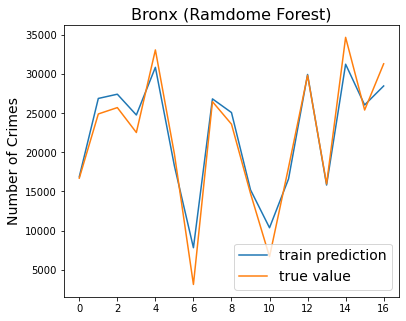

In [40]:
fig = plt.figure(figsize=(6, 5))
_ = plt.plot(range(len(train_prepared)), rf_train_pred, label="train prediction")
_ = plt.plot(range(len(train_prepared)), train_labels, label="true value")
_ = plt.legend(fontsize=14)
_ = plt.ylabel("Number of Crimes",fontsize=14)
_ = plt.title("Bronx (Ramdome Forest)",fontsize=16)

In [41]:
rf_test_pred = forest_reg.predict(test_prepared)
rf_mse_test = mean_squared_error(test_labels, rf_test_pred)
rf_rmse_test = np.sqrt(rf_mse_test)
rf_rmse_test

5847.8003539311685

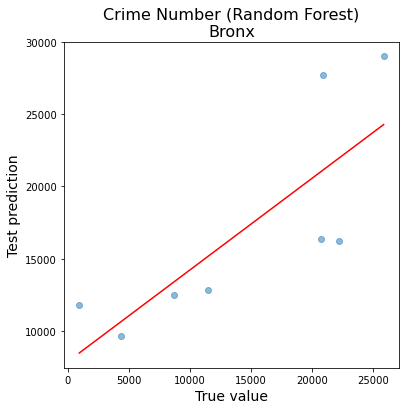

In [42]:
fig = plt.figure(figsize=(6, 6))
_ = plt.scatter(test_labels, rf_test_pred, alpha=0.5)
_ = plt.xlabel("True value", fontsize=14)
_ = plt.ylabel("Test prediction", fontsize=14)
_ = plt.title("Crime Number (Random Forest)\nBronx", fontsize = 16)

#Fitted line
lr = LinearRegression()
lr.fit(np.array(test_labels).reshape(-1,1), rf_test_pred)
b = lr.intercept_
a = lr.coef_[0]
x = np.linspace(min(test_labels),max(test_labels),100)
y = a*x+b
_ = plt.plot(x,y,'-r')

In [43]:
from scipy.stats import pearsonr
corr, _ = pearsonr(rf_test_pred, test_labels)
r2_rf = corr**2
r2_rf

0.6342038537830126

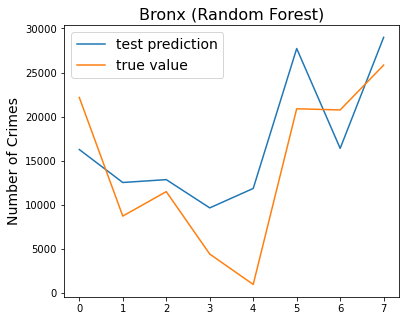

In [44]:
fig = plt.figure(figsize=(6, 5))
_ = plt.plot(range(len(test_prepared)), rf_test_pred, label="test prediction")
_ = plt.plot(range(len(test_prepared)), test_labels, label="true value")
_ = plt.legend(fontsize=14)
_ = plt.ylabel("Number of Crimes",fontsize=14)
_ = plt.title("Bronx (Random Forest)",fontsize=16)